In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [3]:
sns.set_style('dark', {'axes.grid':True, 'axes.edgecolor':'black', 'font.family':['serif'],'font.serif':['Roman'],
                       'xticks.bottom':True, 'ytick.left':True})

In [4]:
cwd = os.getcwd()
filename = cwd + '/winequality-red.csv'
data = pd.read_csv(filename)

In [5]:
print(data.keys())

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [6]:
# check if we have null values
print('Null values: ')
data.isnull().values.any()

Null values: 


False

In [7]:
values_counts=data['quality'].value_counts()
print("These are the observed values for " + 'quality' + ":")
print(values_counts)

These are the observed values for quality:
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


In [8]:
# describe variables
data.loc[:, data.columns != 'quality'].describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol  
count  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983  
std       0.154386     0.169507     1.065668  
min       2.740000     0.330000     8.400000  
25%       3.210000     0.550000     9.500000  
50%       3.310000     0.620000    10.200000  
75%       3.400000     0.730000    11.100000  
max       4.010000     2.000000    14.900000

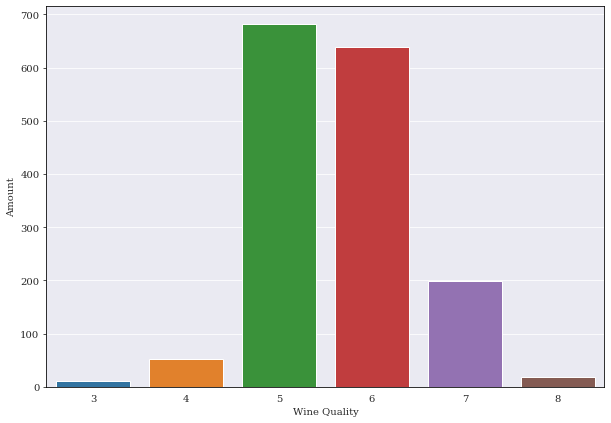

In [9]:
fig = plt.figure(figsize = (10,7))
sns.countplot(x = 'quality', data = data)
plt.xlabel('Wine Quality')
plt.ylabel('Amount')
plt.show()

# create different data sets

In [10]:
review = []
for val in data['quality']:
    if (val <5 and val>2):
        review.append(0)
    if (val>4 and val<7):
        review.append(1)
    if (val>6):
        review.append(2)
data_3_targets = data.copy()
data_3_targets['review'] = review
data_3_targets = data_3_targets.drop(columns = ['quality'])

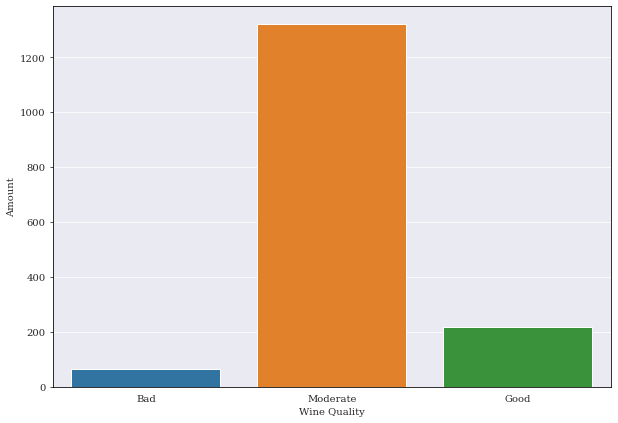

In [12]:
fig = plt.figure(figsize = (10,7))
sns.countplot(x = 'review', data = data_3_targets)
plt.xlabel('Wine Quality')
plt.xticks((0,1,2),['Bad', 'Moderate', 'Good'])
plt.ylabel('Amount')
plt.show()

In [10]:
predictors = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
             'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [13]:
# test and training data for 6 targets
X_data_6_targets = data.drop(columns = ['quality'])
y_data_6_targets = data.loc[:,'quality']
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_data_6_targets, y_data_6_targets, 
                                                        test_size = 0.2, random_state = 1)



In [14]:
print('Percent of each score in the training data')
print(y_train6.value_counts()/y_train6.shape[0])

Percent of each score in the training data
5    0.422987
6    0.394058
7    0.132134
4    0.031274
8    0.012510
3    0.007037
Name: quality, dtype: float64


In [15]:
# test and training data for 3 targets
X_data_3_targets = data_3_targets.drop(columns = ['review'])
y_data_3_targets = data_3_targets.loc[:,'review']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_data_3_targets, y_data_3_targets, 
                                                        test_size = 0.2, random_state = 1)



In [16]:
print('Percent of each score in the training data')
print(y_train3.value_counts()/y_train3.shape[0])

Percent of each score in the training data
1    0.817045
2    0.144644
0    0.038311
Name: review, dtype: float64


PC       % Variance
1        94.5396 
2        4.9213  
3        0.2805  
4        0.1574  
5        0.0935  
6        0.0036  
7        0.002   
8        0.001   
9        0.0009  
10       0.0001  
11       0.0     


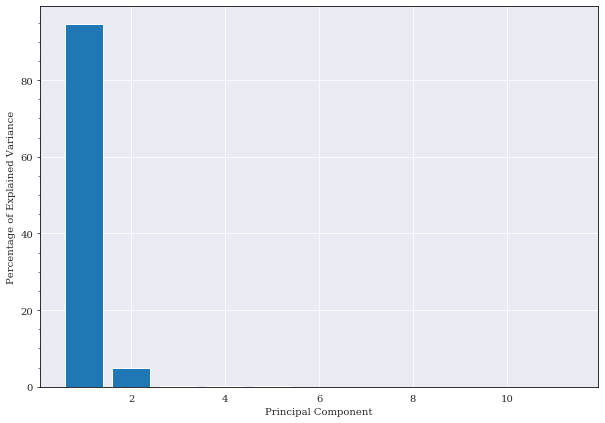

In [27]:
# PCA ANALYSIS
from sklearn.decomposition import PCA

pca100 = PCA()
pca100_X_train = pca100.fit_transform(X_train)
per_var = pca100.explained_variance_ratio_*100

fmt = '{:<8} {:<8}'
print(fmt.format('PC', '% Variance'))
for i in range(len(per_var)):
    print(fmt.format(i+1, np.round(per_var[i], decimals = 4)))

fig, ax = plt.subplots(figsize=(10,7))
sns.set(font_scale=1.5)
sns.set_style('dark',{'axes.edgecolor': '.1','xtick.bottom': True,'ytick.left': True,'axes.grid':True,
                      'grid.color':'white','font.family':['serif'],'font.serif':['serif']})
ax.bar(x=range(1,len(per_var)+1),height=per_var)
ax.set_ylabel("Percentage of Explained Variance")
ax.set_xlabel("Principal Component")
ax.minorticks_on()

In [17]:
# change to numpy
X_train6 = X_train6.to_numpy()
X_test6 = X_test6.to_numpy()
y_train6 = y_train6.to_numpy()
y_test6 = y_test6.to_numpy()

X_train3 = X_train3.to_numpy()
X_test3 = X_test3.to_numpy()
y_train3 = y_train3.to_numpy()
y_test3 = y_test3.to_numpy()

In [18]:
y_train6 = y_train6.reshape(-1,1)
y_test6 = y_test6.reshape(-1,1)

y_train3 = y_train3.reshape(-1,1)
y_test3 = y_test3.reshape(-1,1)

In [22]:
# one hot encoding
enc = OneHotEncoder(categories = 'auto')
y_train6_hot = enc.fit_transform(y_train6).toarray()
y_test6_hot = enc.fit_transform(y_test6).toarray()

y_train3_hot = enc.fit_transform(y_train3).toarray()
y_test3_hot = enc.fit_transform(y_test3).toarray()

print('Checking 6 target data....')
print(y_train6_hot[:10])
print(y_test6_hot.shape)
print(X_train6.shape)
print('\nChecking 3 target data....')
print(y_train3_hot[:10])
print(y_test3_hot.shape)
print(X_train3.shape)

Checking 6 target data....
[[0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]
(320, 6)
(1279, 11)

Checking 3 target data....
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]
(320, 3)
(1279, 11)


In [23]:
# Scale Data
trainScaler = StandardScaler()
trainScaler.fit(X_train6)
X_train6 = trainScaler.transform(X_train6)
X_test6 = trainScaler.transform(X_test6)
X_train3 = trainScaler.transform(X_train3)
X_test3 = trainScaler.transform(X_test3)

In [26]:
print('Checking that one hot conversion went well...')
for i in range(y_train6_hot.shape[0]):
    if np.sum(y_train6_hot[i]) != 1:
        print(i)

Checking that one hot conversion went well...


Data now ready for analysis

# ANALYSIS 6 target

In [186]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
import itertools as itertools
import numpy as np

In [32]:
models = [RandomForestClassifier(random_state = 1), DecisionTreeClassifier(random_state = 1), 
          MLPClassifier(max_iter = 10000, random_state = 1)]
model_names = ['Random Forest', 'Decision Tree', 'Neural Network']

In [259]:
print('Baseline scores for out of the box SKlearn methods...')
acc = np.zeros_like(models)
for i in range(len(models)):
    solver = models[i]
    solver.fit(X_train6, y_train6_hot)
    acc[i] = solver.score(X_test6, y_test6_hot)
    print('{:<8} {:<8}'.format(model_names[i],acc[i]))

Baseline scores for out of the box SKlearn methods...
Random Forest 0.54375 
Decision Tree 0.64375 
Neural Network 0.54375 


# RANDOM FOREST

In [36]:
n_estimators = [int(x) for x in np.linspace(100, 2000, 20)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [37]:
rf = RandomForestClassifier(random_state = 1)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, 
                               random_state=1, n_jobs = 1)
rf_random.fit(X_train6, y_train6_hot)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=40, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=40, bootstrap=False, total=   5.3s
[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=40, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s


[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=40, bootstrap=False, total=   5.2s
[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=40, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=40, bootstrap=False, total=   5.1s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   3.9s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   3.9s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimator

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  6.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [38]:
rf_random.best_score_

0.5746677091477717

In [39]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 80,
 'bootstrap': False}

In [41]:
# plot CV values

def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

# Calling Method 
#plot_grid_search(rf_random.cv_results_, n_estimators, max_depth, 'N Estimators', 'Max Depth')

In [51]:
updated_params = {'n_estimators': [200,250,300,350,400], 'max_features':['log2'], 'max_depth': [10,25,50,75,100],
                  'min_samples_split': [2], 'min_samples_leaf': [2], 'bootstrap':[False]}

In [52]:
rf = RandomForestClassifier(random_state = 1)
rf_grid = GridSearchCV(estimator = rf, param_grid = updated_params, cv = 3, verbose=2, scoring = 'accuracy',
                               n_jobs = 1)
rf_grid.fit(X_train6, y_train6_hot)
rf_grid.score(X_test6, y_test6_hot)
pred = rf_grid.predict(X_test6)


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=250, total=   0.7s
[CV] bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=250, total=   0.7s
[CV] bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=False, max_d

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=1,
             param_grid={'boot

In [53]:
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 25,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [54]:
rf_grid.best_score_

0.5746677091477717

In [251]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.plasma,
                          name = 'string'):

    fig = plt.figure(figsize=(10,7))
    sns.set_style({'axes.grid':False})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] < thresh else "black")
    plt.ylim(-.5,5.5)
    plt.xlim(-.5,5.5)
    plt.tight_layout()
    plt.grid(False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.colorbar()
    plt.savefig(name)
    plt.show()

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
(320, 6)
0.640625
time  1.2568469047546387
[[  0   0   1   0   0   0]
 [  6   0   6   1   0   0]
 [  9   0 113  17   1   0]
 [ 25   0  23  81   5   0]
 [  9   0   2   8  11   0]
 [  1   0   0   0   1   0]]


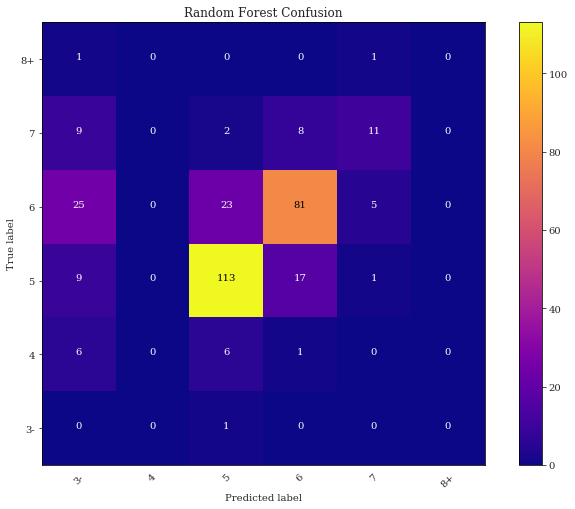

In [261]:
import time

start = time.time()
rf_optimized = RandomForestClassifier(bootstrap=False, max_depth=25,max_features='log2',
                                     min_samples_leaf=2,min_samples_split=2,n_estimators=300)
rf_optimized.fit(X_train6, y_train6_hot)
score = rf_optimized.score(X_test6, y_test6_hot)
pred = rf_optimized.predict(X_test6)
#for i in range(pred.shape[0]):
#    if np.sum(pred[i])!=1:
#        pred[i,2] = 1

print(pred)
print(y_test6_hot.shape)
conf = confusion_matrix(y_test6_hot.argmax(axis=1), pred.argmax(axis=1))
print(score)
end = time.time()
print('time ', end-start)

classes = ['3-','4','5','6','7','8+']
plot_confusion_matrix(conf, classes, normalize=False,
                          title='Random Forest Confusion',
                          cmap=plt.cm.plasma,
                          name = 'rf_confusion.png')

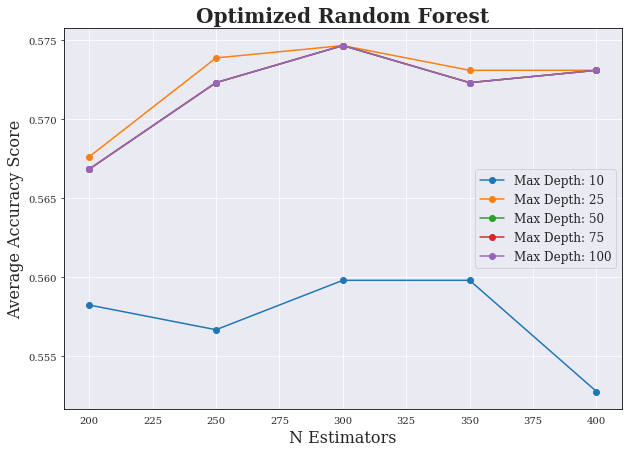

In [246]:
n_estimators = [200,250,300,350,400]
max_depth = [10,25,50,75,100]
model = rf_grid
grid_param1 = n_estimators
grid_param2 = max_depth
name_param1 = 'N Estimators'
name_param2 = 'Max Depth'

scores_mean = model.cv_results_['mean_test_score']
scores_mean = np.array(scores_mean).reshape(len(grid_param1),len(grid_param2))

# Plot Grid search scores
fig, ax = plt.subplots(figsize = (10,7))

# Param1 is the X-axis, Param 2 is represented as a different curve (color line)
for idx, val in enumerate(max_depth):
    ax.plot(grid_param1, scores_mean[idx,:], '-o', label= name_param2 + ': ' + str(val))

ax.set_title("Optimized Random Forest", fontsize=20, fontweight='bold')
ax.set_xlabel(name_param1, fontsize=16)
ax.set_ylabel('Average Accuracy Score', fontsize=16)
ax.legend(loc="best", fontsize=12)
ax.grid('on')
plt.savefig('opt_RF.png')

# *NEural NET

In [123]:
random_grid = {'learning_rate_init':[1e-3,1e-1],'alpha':[1e-3], 
               'hidden_layer_sizes':[(1000,),(1000,1000),(1000,1000,1000),(1000,1000,1000,1000)], 
               'solver':['adam','sgd','lbfgs'],
               'activation':['relu','logistic']}

In [124]:
NN = MLPClassifier(max_iter = 400, random_state = 1)
NN_random = RandomizedSearchCV(estimator = NN, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, 
                               random_state=1, n_jobs = 1)
NN_random.fit(X_train6, y_train6_hot)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 48 is smaller than n_iter=50. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] solver=adam, learning_rate_init=0.001, hidden_layer_sizes=(1000,), alpha=0.001, activation=relu 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


[CV]  solver=adam, learning_rate_init=0.001, hidden_layer_sizes=(1000,), alpha=0.001, activation=relu, total=   5.0s
[CV] solver=adam, learning_rate_init=0.001, hidden_layer_sizes=(1000,), alpha=0.001, activation=relu 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, learning_rate_init=0.001, hidden_layer_sizes=(1000,), alpha=0.001, activation=relu, total=   5.0s
[CV] solver=adam, learning_rate_init=0.001, hidden_layer_sizes=(1000,), alpha=0.001, activation=relu 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, learning_rate_init=0.001, hidden_layer_sizes=(1000,), alpha=0.001, activation=relu, total=   5.0s
[CV] solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(1000,), alpha=0.001, activation=relu 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(1000,), alpha=0.001, activation=relu, total=   4.9s
[CV] solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(1000,), alpha=0.001, activation=relu 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(1000,), alpha=0.001, activation=relu, total=   4.9s
[CV] solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(1000,), alpha=0.001, activation=relu 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(1000,), alpha=0.001, activation=relu, total=   5.0s
[CV] solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000,), alpha=0.001, activation=relu 
[CV]  solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000,), alpha=0.001, activation=relu, total=   2.7s
[CV] solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000,), alpha=0.001, activation=relu 
[CV]  solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000,), alpha=0.001, activation=relu, total=   3.7s
[CV] solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000,), alpha=0.001, activation=relu 
[CV]  solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000,), alpha=0.001, activation=relu, total=   3.5s
[CV] solver=adam, learning_rate_init=0.1, hidden_layer_sizes=(1000,), alpha=0.001, activation=relu 
[CV]  solver=adam, learning_rate_init=0.1, hidden_layer_sizes=(1000,), alpha=0.001, activation=relu, total=   0.6s
[CV] s

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=0.1, hidden_layer_sizes=(1000,), alpha=0.001, activation=relu, total=   5.0s
[CV] solver=lbfgs, learning_rate_init=0.1, hidden_layer_sizes=(1000,), alpha=0.001, activation=relu 
[CV]  solver=lbfgs, learning_rate_init=0.1, hidden_layer_sizes=(1000,), alpha=0.001, activation=relu, total=   2.8s
[CV] solver=lbfgs, learning_rate_init=0.1, hidden_layer_sizes=(1000,), alpha=0.001, activation=relu 
[CV]  solver=lbfgs, learning_rate_init=0.1, hidden_layer_sizes=(1000,), alpha=0.001, activation=relu, total=   3.7s
[CV] solver=lbfgs, learning_rate_init=0.1, hidden_layer_sizes=(1000,), alpha=0.001, activation=relu 
[CV]  solver=lbfgs, learning_rate_init=0.1, hidden_layer_sizes=(1000,), alpha=0.001, activation=relu, total=   3.5s
[CV] solver=adam, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000), alpha=0.001, activation=relu 
[CV]  solver=adam, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000), alpha=0.001, activation=relu, total=  37.2s
[CV] s

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000), alpha=0.001, activation=relu, total=  48.1s
[CV] solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000), alpha=0.001, activation=relu 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000), alpha=0.001, activation=relu, total=  47.9s
[CV] solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000), alpha=0.001, activation=relu 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000), alpha=0.001, activation=relu, total=  49.3s
[CV] solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000), alpha=0.001, activation=relu 
[CV]  solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000), alpha=0.001, activation=relu, total=  20.8s
[CV] solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000), alpha=0.001, activation=relu 
[CV]  solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000), alpha=0.001, activation=relu, total=  31.2s
[CV] solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000), alpha=0.001, activation=relu 
[CV]  solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000), alpha=0.001, activation=relu, total=  28.5s
[CV] solver=adam, learning_rate_init=0.1, hidden_layer_sizes=(1000, 1000), alpha=0.001, activation=relu 
[CV]  solver=adam, learning_rate_init=0.1, hidden_layer_sizes=(1000, 1000), alpha

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000, 1000), alpha=0.001, activation=relu, total= 1.5min
[CV] solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000, 1000), alpha=0.001, activation=relu 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000, 1000), alpha=0.001, activation=relu, total= 1.5min
[CV] solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000, 1000), alpha=0.001, activation=relu 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000, 1000), alpha=0.001, activation=relu, total= 1.5min
[CV] solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000, 1000), alpha=0.001, activation=relu 
[CV]  solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000, 1000), alpha=0.001, activation=relu, total=  45.1s
[CV] solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000, 1000), alpha=0.001, activation=relu 
[CV]  solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000, 1000), alpha=0.001, activation=relu, total=  59.2s
[CV] solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000, 1000), alpha=0.001, activation=relu 
[CV]  solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000, 1000), alpha=0.001, activation=relu, total= 1.0min
[CV] solver=adam, learning_rate_init=0.1, hidden_layer_sizes=(1000, 1000, 1000), alpha=0.001, activation=relu 
[CV]  solver=adam, learning_rate_

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000, 1000, 1000), alpha=0.001, activation=relu, total= 2.3min
[CV] solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000, 1000, 1000), alpha=0.001, activation=relu 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000, 1000, 1000), alpha=0.001, activation=relu, total= 2.3min
[CV] solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000, 1000, 1000), alpha=0.001, activation=relu 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000, 1000, 1000), alpha=0.001, activation=relu, total= 2.3min
[CV] solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000, 1000, 1000), alpha=0.001, activation=relu 
[CV]  solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000, 1000, 1000), alpha=0.001, activation=relu, total= 1.2min
[CV] solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000, 1000, 1000), alpha=0.001, activation=relu 
[CV]  solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000, 1000, 1000), alpha=0.001, activation=relu, total= 1.6min
[CV] solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000, 1000, 1000), alpha=0.001, activation=relu 
[CV]  solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000, 1000, 1000, 1000), alpha=0.001, activation=relu, total= 1.8min
[CV] solver=adam, learning_rate_init=0.1, hidden_layer_sizes=(1000, 1000, 1000, 1000), alpha=0.001, ac

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(1000,), alpha=0.001, activation=logistic, total=   5.3s
[CV] solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(1000,), alpha=0.001, activation=logistic 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(1000,), alpha=0.001, activation=logistic, total=   5.3s
[CV] solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(1000,), alpha=0.001, activation=logistic 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(1000,), alpha=0.001, activation=logistic, total=   5.3s
[CV] solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000,), alpha=0.001, activation=logistic 
[CV]  solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000,), alpha=0.001, activation=logistic, total=   9.1s
[CV] solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000,), alpha=0.001, activation=logistic 
[CV]  solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000,), alpha=0.001, activation=logistic, total=   7.4s
[CV] solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000,), alpha=0.001, activation=logistic 
[CV]  solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(1000,), alpha=0.001, activation=logistic, total=   7.1s
[CV] solver=adam, learning_rate_init=0.1, hidden_layer_sizes=(1000,), alpha=0.001, activation=logistic 
[CV]  solver=adam, learning_rate_init=0.1, hidden_layer_sizes=(1000,), alpha=0.001, activ

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed: 73.9min finished
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_iter=400, momentum=0.9,
                                           n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           rand...
                                           verbose=False, warm_start=False),
                   iid='warn', n_iter=50, n_jobs=1,
                   param_distributions={'activation

In [125]:
NN_random.best_score_

0.5840500390930414

In [126]:
NN_random.best_params_


{'solver': 'sgd',
 'learning_rate_init': 0.1,
 'hidden_layer_sizes': (1000, 1000, 1000),
 'alpha': 0.001,
 'activation': 'relu'}

In [129]:
NN_random.cv_results_['mean_test_score']

array([0.54417514, 0.45738858, 0.52071931, 0.47693511, 0.54026583,
       0.52071931, 0.55981235, 0.48631744, 0.53948397, 0.28459734,
       0.50430023, 0.53948397, 0.57623143, 0.50195465, 0.54261142,
       0.        , 0.58405004, 0.54261142, 0.57310399, 0.50742768,
       0.55824863, 0.        , 0.52931978, 0.55824863, 0.3612197 ,
       0.30179828, 0.46129789, 0.5308835 , 0.2814699 , 0.46129789,
       0.52853792, 0.        , 0.49413604, 0.09929633, 0.49960907,
       0.49413604, 0.52071931, 0.        , 0.49179046, 0.1297889 ,
       0.35496482, 0.49179046, 0.48006255, 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [130]:
params1 = {'hidden_layer_sizes':[(10,10,10),(100,100,100),(1000,1000,1000)], 'solver':['sgd'],
           'learning_rate_init':np.linspace(.001,.3,20), 'alpha':[0.001]}

In [108]:
print(np.linspace(.001,.3,20))

[0.001      0.01673684 0.03247368 0.04821053 0.06394737 0.07968421
 0.09542105 0.11115789 0.12689474 0.14263158 0.15836842 0.17410526
 0.18984211 0.20557895 0.22131579 0.23705263 0.25278947 0.26852632
 0.28426316 0.3       ]


In [131]:
NN = MLPClassifier(max_iter = 10000, random_state = 1)
NN_grid = GridSearchCV(estimator = NN, param_grid = params1, cv = 3, verbose=2, scoring = 'accuracy',
                       n_jobs = 1)
NN_grid.fit(X_train6, y_train6_hot)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001, solver=sgd 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001, solver=sgd, total=   4.2s
[CV] alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001, solver=sgd 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV]  alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001, solver=sgd, total=   5.4s
[CV] alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001, solver=sgd 
[CV]  alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.001, solver=sgd, total=   7.5s
[CV] alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.016736842105263158, solver=sgd 
[CV]  alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.016736842105263158, solver=sgd, total=   1.2s
[CV] alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.016736842105263158, solver=sgd 
[CV]  alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.016736842105263158, solver=sgd, total=   0.9s
[CV] alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.016736842105263158, solver=sgd 
[CV]  alpha=0.001, hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.016736842105263158, solver=sgd, total=   0.8s
[CV] alpha=0.001, hidden_layer_siz

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed: 55.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=10000,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_s...
                                                (1000, 1000, 1000)],
                         'learning_rate_init': array([0.001     , 0.01673684, 0.03247368, 0.04821053, 0.06394737,
       0.07968421, 0.09542105, 0.11115789, 0.12689474, 0.14263158,
       0.15836842, 0.17410526, 0.18984211, 0.20557895, 0.22131579,
   

In [132]:
NN_grid.best_score_

0.5801407349491791

In [133]:
NN_grid.best_params_

{'alpha': 0.001,
 'hidden_layer_sizes': (1000, 1000, 1000),
 'learning_rate_init': 0.15836842105263157,
 'solver': 'sgd'}

[[0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 ...
 [0 0 1 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 1 0 0]]
(320, 6)
0.628125
time  23.25183892250061
[[  0   0   0   1   0   0]
 [  4   0   7   2   0   0]
 [  6   2 101  28   3   0]
 [ 13   2  25  86   8   0]
 [  4   0   2   9  15   0]
 [  0   0   0   0   1   1]]


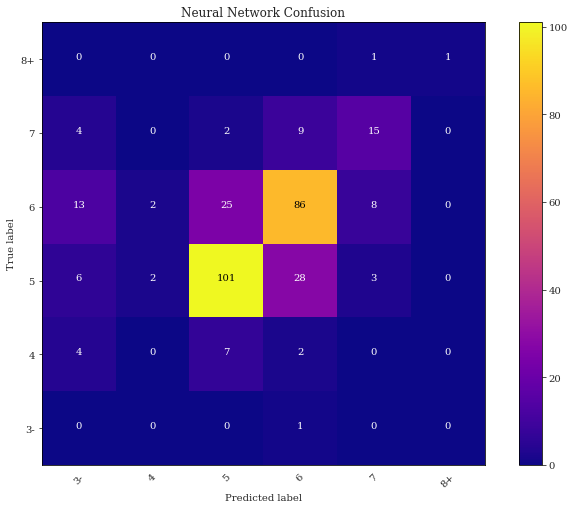

In [260]:
import time

start= time.time()
NN_optimized = MLPClassifier(max_iter = 10000, alpha = 0.001, hidden_layer_sizes = (1000,1000,1000), 
                             learning_rate_init = 0.15836842105263157, solver = 'sgd')
NN_optimized.fit(X_train6, y_train6_hot)
score = NN_optimized.score(X_test6, y_test6_hot)
pred = NN_optimized.predict(X_test6)

print(pred)
print(y_test6_hot.shape)
conf_NN = confusion_matrix(y_test6_hot.argmax(axis=1), pred.argmax(axis=1))
print(score)
end = time.time()
print('time ', end-start)
classes = ['3-','4','5','6','7','8+']
plot_confusion_matrix(conf_NN, classes, normalize=False,
                          title='Neural Network Confusion',
                          cmap=plt.cm.plasma,
                          name = 'nn_confusion.png')

(3, 20)


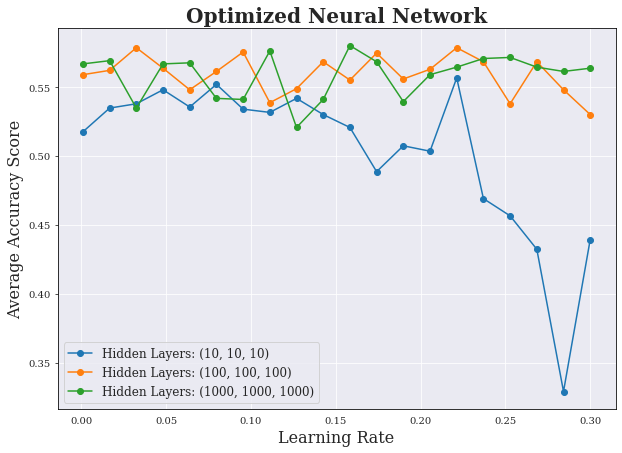

In [245]:
hidden_layer_sizes = [(10,10,10),(100,100,100),(1000,1000,1000)]
learning_rate_init = np.linspace(.001, .3, 20)
model = NN_grid
grid_param1 = learning_rate_init
grid_param2 = hidden_layer_sizes
name_param1 = 'Learning Rate'
name_param2 = 'Hidden Layers'

scores_mean = model.cv_results_['mean_test_score']
scores_mean = np.array(scores_mean).reshape(len(grid_param2),len(grid_param1))
print(scores_mean.shape)
# Plot Grid search scores
fig, ax = plt.subplots(figsize = (10,7))

# Param1 is the X-axis, Param 2 is represented as a different curve (color line)
for idx, val in enumerate(grid_param2):
    ax.plot(grid_param1, scores_mean[idx,:], '-o', label= name_param2 + ': ' + str(val))

ax.set_title("Optimized Neural Network", fontsize=20, fontweight='bold')
ax.set_xlabel(name_param1, fontsize=16)
ax.set_ylabel('Average Accuracy Score', fontsize=16)
ax.legend(loc="best", fontsize=12)
ax.grid('on')
plt.savefig('opt_NN.png')

In [135]:
NN_test = MLPClassifier(hidden_layer_sizes = (1000,1000,1000,1000),max_iter = 10000, random_state=1)
NN_test.fit(X_train6,y_train6_hot)
print(NN_test.score(X_test6,y_test6_hot))

0.65


# Decisoins Tree

In [ ]:
import time
start = time.time()
grid = {'criterion':['gini','entropy'], 'max_depth':np.linspace(1,10,10), 'max_features':[1,2,3,4,5,6,7,8,9,10,11],
        'max_leaf_nodes':[2,5,10,15], 'min_samples_split':[int(x) for x in np.linspace(2,50,25)]}
tree = DecisionTreeClassifier(random_state=1)
tree_grid = GridSearchCV(estimator = tree, param_grid = grid, scoring = 'accuracy', cv = 3, verbose=2, 
                               n_jobs = 1)
tree_fit = tree_grid.fit(X_train6, y_train6_hot)
end = time.time()
print('time: ', (start-end))

Fitting 3 folds for each of 22000 candidates, totalling 66000 fits
[CV] criterion=gini, max_depth=1.0, max_features=1, max_leaf_nodes=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=1.0, max_features=1, max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1.0, max_features=1, max_leaf_nodes=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=1.0, max_features=1, max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1.0, max_features=1, max_leaf_nodes=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=1.0, max_features=1, max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1.0, max_features=1, max_leaf_nodes=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=1.0, max_features=1, max_leaf_nodes=2, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=1.0, max_features=1, max_leaf_nodes=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=1.0, max_features=1, m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=1.0, max_features=1, max_leaf_nodes=2, min_samples_split=40, total=   0.0s
[CV] criterion=gini, max_depth=1.0, max_features=1, max_leaf_nodes=2, min_samples_split=40 
[CV]  criterion=gini, max_depth=1.0, max_features=1, max_leaf_nodes=2, min_samples_split=40, total=   0.0s
[CV] criterion=gini, max_depth=1.0, max_features=1, max_leaf_nodes=2, min_samples_split=42 
[CV]  criterion=gini, max_depth=1.0, max_features=1, max_leaf_nodes=2, min_samples_split=42, total=   0.0s
[CV] criterion=gini, max_depth=1.0, max_features=1, max_leaf_nodes=2, min_samples_split=42 
[CV]  criterion=gini, max_depth=1.0, max_features=1, max_leaf_nodes=2, min_samples_split=42, total=   0.0s
[CV] criterion=gini, max_depth=1.0, max_features=1, max_leaf_nodes=2, min_samples_split=42 
[CV]  criterion=gini, max_depth=1.0, max_features=1, max_leaf_nodes=2, min_samples_split=42, total=   0.0s
[CV] criterion=gini, max_depth=1.0, max_features=1, max_leaf_nodes=2, min_samples_split=44 
[CV] 

In [155]:
tree_grid.best_params_

{'criterion': 'gini',
 'max_depth': 7.0,
 'max_features': 9,
 'max_leaf_nodes': 15,
 'min_samples_split': 40}

In [156]:
tree_grid.best_score_


0.547302580140735

In [159]:
import time
start = time.time()
grid1 = {'criterion':['gini'], 'max_depth':np.linspace(1,10,10), 'max_features':[9],
        'max_leaf_nodes':[2,5,10,15,20,25,30,35,40], 'min_samples_split':[40]}
tree = DecisionTreeClassifier(random_state=1)
tree_grid1 = GridSearchCV(estimator = tree, param_grid = grid1, scoring = 'accuracy', cv = 3, verbose=2, 
                               n_jobs = 1)
tree_fit1 = tree_grid1.fit(X_train6, y_train6_hot)
end = time.time()
print('time: ', (end-start))

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV] criterion=gini, max_depth=1.0, max_features=9, max_leaf_nodes=2, min_samples_split=40 
[CV]  criterion=gini, max_depth=1.0, max_features=9, max_leaf_nodes=2, min_samples_split=40, total=   0.0s
[CV] criterion=gini, max_depth=1.0, max_features=9, max_leaf_nodes=2, min_samples_split=40 
[CV]  criterion=gini, max_depth=1.0, max_features=9, max_leaf_nodes=2, min_samples_split=40, total=   0.0s
[CV] criterion=gini, max_depth=1.0, max_features=9, max_leaf_nodes=2, min_samples_split=40 
[CV]  criterion=gini, max_depth=1.0, max_features=9, max_leaf_nodes=2, min_samples_split=40, total=   0.0s
[CV] criterion=gini, max_depth=1.0, max_features=9, max_leaf_nodes=5, min_samples_split=40 
[CV]  criterion=gini, max_depth=1.0, max_features=9, max_leaf_nodes=5, min_samples_split=40, total=   0.0s
[CV] criterion=gini, max_depth=1.0, max_features=9, max_leaf_nodes=5, min_samples_split=40 
[CV]  criterion=gini, max_depth=1.0, max_features=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=2.0, max_features=9, max_leaf_nodes=25, min_samples_split=40, total=   0.0s
[CV] criterion=gini, max_depth=2.0, max_features=9, max_leaf_nodes=25, min_samples_split=40 
[CV]  criterion=gini, max_depth=2.0, max_features=9, max_leaf_nodes=25, min_samples_split=40, total=   0.0s
[CV] criterion=gini, max_depth=2.0, max_features=9, max_leaf_nodes=30, min_samples_split=40 
[CV]  criterion=gini, max_depth=2.0, max_features=9, max_leaf_nodes=30, min_samples_split=40, total=   0.0s
[CV] criterion=gini, max_depth=2.0, max_features=9, max_leaf_nodes=30, min_samples_split=40 
[CV]  criterion=gini, max_depth=2.0, max_features=9, max_leaf_nodes=30, min_samples_split=40, total=   0.0s
[CV] criterion=gini, max_depth=2.0, max_features=9, max_leaf_nodes=30, min_samples_split=40 
[CV]  criterion=gini, max_depth=2.0, max_features=9, max_leaf_nodes=30, min_samples_split=40, total=   0.0s
[CV] criterion=gini, max_depth=2.0, max_features=9, max_leaf_nodes=35, min_samples_split

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    1.3s finished


In [160]:
tree_grid1.best_params_

{'criterion': 'gini',
 'max_depth': 8.0,
 'max_features': 9,
 'max_leaf_nodes': 25,
 'min_samples_split': 40}

In [161]:
tree_grid1.best_score_

0.563721657544957

[[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]
(320, 6)
0.578125
[[ 0  0  1  0  0  0]
 [ 4  0  6  3  0  0]
 [ 8  0 96 33  3  0]
 [14  0 31 78 11  0]
 [ 2  0  4 13 11  0]
 [ 0  0  0  0  2  0]]


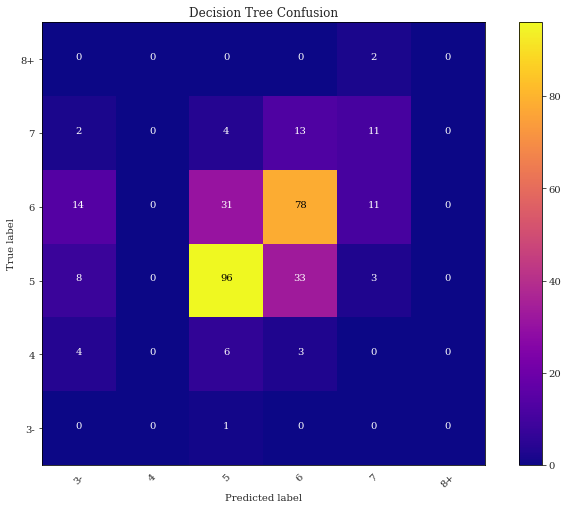

In [255]:
dt_optimized = DecisionTreeClassifier(criterion = 'gini', max_depth = 8.0, max_features = 9, max_leaf_nodes = 25, 
                                      min_samples_split = 40)
dt_optimized.fit(X_train6, y_train6_hot)
score = dt_optimized.score(X_test6, y_test6_hot)
pred = dt_optimized.predict(X_test6)


print(pred)
print(y_test6_hot.shape)
conf_dt = confusion_matrix(y_test6_hot.argmax(axis=1), pred.argmax(axis=1))
print(score)


classes = ['3-','4','5','6','7','8+']
plot_confusion_matrix(conf_dt, classes, normalize=False,
                          title='Decision Tree Confusion',
                          cmap=plt.cm.plasma,
                          name = 'dt_confusion.png')

(10, 9)


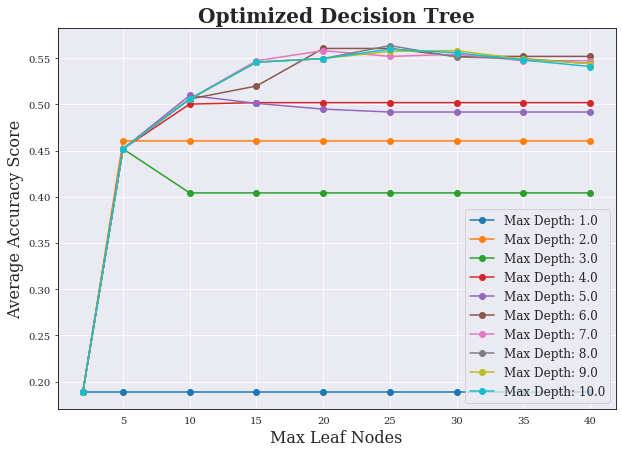

In [244]:
max_leaf_nodes = [2,5,10,15,20,25,30,35,40]
max_depth = np.linspace(1,10,10)
model = tree_grid1
grid_param1 = max_leaf_nodes
grid_param2 = max_depth
name_param1 = 'Max Leaf Nodes'
name_param2 = 'Max Depth'

scores_mean = model.cv_results_['mean_test_score']
scores_mean = np.array(scores_mean).reshape(len(grid_param2),len(grid_param1))
print(scores_mean.shape)
# Plot Grid search scores
fig, ax = plt.subplots(figsize = (10,7))

# Param1 is the X-axis, Param 2 is represented as a different curve (color line)
for idx, val in enumerate(grid_param2):
    ax.plot(grid_param1, scores_mean[idx,:], '-o', label= name_param2 + ': ' + str(val))

ax.set_title('Optimized Decision Tree', fontsize=20, fontweight='bold')
ax.set_xlabel(name_param1, fontsize=16)
ax.set_ylabel('Average Accuracy Score', fontsize=16)
ax.legend(loc="best", fontsize=12)
ax.grid('on')
plt.savefig('opt_DT.png')